Mounting google drive to google colab to acess dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to 224 * 224
IMAGE_SIZE = [224, 224]
# path of google drive to acess train and validation dataset 
train_path = '/content/drive/MyDrive/Dataset/Malaria-Detection-master/malaria-parasite-detection/train/train'
valid_path = '/content/drive/MyDrive/Dataset/Malaria-Detection-master/Malaria-Detection-master/Dataset/Dataset/Test'

Learning - Vgg16 and VGg19 works better compare to Alexnet.Mobile net and resnet gives the less accuracy

In [ ]:
# Importing the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# include_top=False #excluding first layer and last layer.In first layer we will input our image size and last layer would be for classification of Infectious and Non Infectious to Malaria  
# input_shape=IMAGE_SIZE --input IMAGE_SIZE--->224*224 and 3 is the depth which is rgb color channel

VGG19_Model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
VGG19_Model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Keeping the existing weights as it is

for layer in VGG19_Model.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Malaria-Detection-master/malaria-parasite-detection/train/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/Malaria-Detection-master/malaria-parasite-detection/train/train/Uninfected',
 '/content/drive/MyDrive/Dataset/Malaria-Detection-master/malaria-parasite-detection/train/train/Parasitized']

In [ ]:
# flatten the output of the last layer
x = Flatten()(VGG19_Model.output)

Sigmoid would be used for binary classification.Softmax for multiclass classification

In [ ]:
# output layer with two nodes
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19_Model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

For Binary classification ---> Binary_crossentropy

For Categorical Classification---> Categorical_crossentropy 

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = '/content/drive/MyDrive/Dataset/Malaria-Detection-master/malaria-parasite-detection/train/train'
IMAGE_SIZE = 224
BATCH_SIZE = 32
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.33,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Malaria-Detection-master/Malaria-Detection-master/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 16751 images belonging to 2 classes.
Found 8249 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=30,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/30
524/524 [==============================] - 253s 480ms/step - loss: 0.2794 - accuracy: 0.8976 - val_loss: 0.5546 - val_accuracy: 0.8134
Epoch 2/30
524/524 [==============================] - 242s 461ms/step - loss: 0.2466 - accuracy: 0.9103 - val_loss: 0.1572 - val_accuracy: 0.9328
Epoch 3/30
524/524 [==============================] - 241s 460ms/step - loss: 0.2543 - accuracy: 0.9097 - val_loss: 0.2536 - val_accuracy: 0.9030
Epoch 4/30
524/524 [==============================] - 244s 466ms/step - loss: 0.2374 - accuracy: 0.9159 - val_loss: 1.5461 - val_accuracy: 0.6194
Epoch 5/30
524/524 [==============================] - 246s 470ms/step - loss: 0.2694 - accuracy: 0.9051 - val_loss: 0.1345 - val_accuracy: 0.9328
Epoch 6/30
524/524 [==============================] - 244s 465ms/step - loss: 0.2554 - accuracy: 0.9091 - val_loss: 0.1954 - val_accuracy: 0.9179
Epoch 7/30
524/524 [==============================] - 234s 446ms/step - loss: 0.2248 - accuracy: 0.9200 - val_loss: 0.1585 -

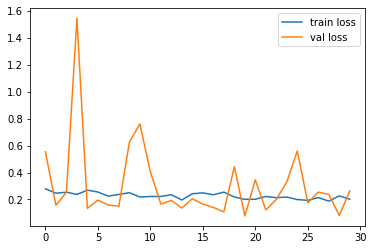

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

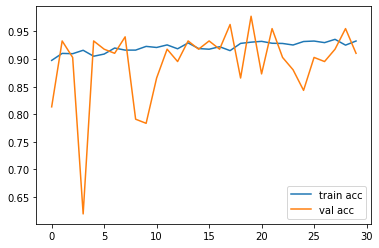

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!ls /content/gdrive

ls: cannot access '/content/gdrive': No such file or directory


In [ ]:
/content/drive/MyDrive/Dataset/Malaria-Detection-master

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/drive/MyDrive/Dataset/Malaria-Detection-master/{model_save_name}" 
torch.save(model.state_dict(), path)

In [ ]:
/content/model_vgg19.h5

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5' )

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[8.85816693e-01, 1.14183351e-01],
       [9.29867983e-01, 7.01320246e-02],
       [2.39120796e-02, 9.76087928e-01],
       [8.69247258e-01, 1.30752772e-01],
       [6.76842451e-01, 3.23157519e-01],
       [9.99952555e-01, 4.74062581e-05],
       [8.55661929e-03, 9.91443336e-01],
       [7.53275573e-01, 2.46724457e-01],
       [9.48859870e-01, 5.11401743e-02],
       [2.39025708e-03, 9.97609735e-01],
       [1.00000000e+00, 6.98007407e-12],
       [1.32472283e-04, 9.99867558e-01],
       [1.00000000e+00, 8.40684568e-17],
       [9.99671698e-01, 3.28321563e-04],
       [4.18679498e-04, 9.99581277e-01],
       [2.97542010e-03, 9.97024596e-01],
       [1.62315252e-03, 9.98376846e-01],
       [9.99999881e-01, 6.52991474e-08],
       [7.94608146e-04, 9.99205410e-01],
       [9.99960899e-01, 3.90470013e-05],
       [9.99999881e-01, 8.95104435e-08],
       [9.99999881e-01, 8.01101834e-08],
       [9.99995589e-01, 4.44747911e-06],
       [9.99978662e-01, 2.13759358e-05],
       [1.000000

In [ ]:
# argmax will provide position of maximum values in index
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Malaria-Detection-master/Malaria-Detection-master/Dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


Custom CNN for classification

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
model_2=Sequential()
model_2.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(500,activation="relu"))
model_2.add(Dense(2,activation="softmax"))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model_2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history_2 = model_2.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=30,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/30
524/524 [==============================] - 323s 617ms/step - loss: 0.6427 - accuracy: 0.6724 - val_loss: 0.3242 - val_accuracy: 0.8676
Epoch 2/30
524/524 [==============================] - 323s 617ms/step - loss: 0.2249 - accuracy: 0.9226 - val_loss: 0.2011 - val_accuracy: 0.9259
Epoch 3/30
524/524 [==============================] - 322s 616ms/step - loss: 0.1959 - accuracy: 0.9362 - val_loss: 0.2002 - val_accuracy: 0.9343
Epoch 4/30
524/524 [==============================] - 321s 613ms/step - loss: 0.1900 - accuracy: 0.9361 - val_loss: 0.2199 - val_accuracy: 0.9233
Epoch 5/30
524/524 [==============================] - 322s 615ms/step - loss: 0.1781 - accuracy: 0.9407 - val_loss: 0.1739 - val_accuracy: 0.9404
Epoch 6/30
524/524 [==============================] - 320s 611ms/step - loss: 0.1755 - accuracy: 0.9426 - val_loss: 0.1966 - val_accuracy: 0.9371
Epoch 7/30
524/524 [==============================] - 317s 606ms/step - loss: 0.1696 - accuracy: 0.9453 - val_loss: 0.1809 -

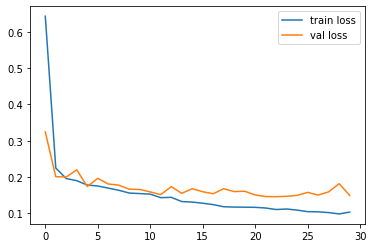

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

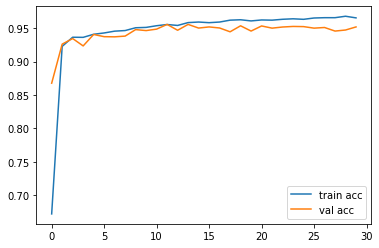

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history_2.history['accuracy'], label='train acc')
plt.plot(history_2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model_2.save('model_Custom_CNN.h5')